<a href="https://colab.research.google.com/github/javier-jaime/Route-Recommender/blob/main/MST_Simberi_Mine_EDA_XLS_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

### MST Simberi Mine Load Summary

## Data Preparation

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
from google.colab import files

import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans # Uncomment if required

In [2]:
# Mount Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
# Read dataset from excel in Google Drive to Pandas Data Frame
data = pd.read_excel('drive/MyDrive/Colab_Data/Simberi Load Summary - 13th July 2022.xlsx', sheet_name='DMR')
print(data.shape)
# data['ID'] = data['ID'].astype(int)
# data.set_index('ID', inplace=True)

(628, 17)


In [59]:
data.head()

,FleetNumber,DepartureDate,AssetName2,DepartureTime,DepartFrom,DrivingTime,StandingTime,Duration,Distance,MaxSpeed,AvgSpeed,ArrivalTime,ArrivalDate,ArriveAt,NextDepartureDateTime,TimeAtLocation,TotalFuelUsedMeasured
0,AT018,13/07/2022,Allen Yailus (HBS),2022-07-13 08:10:53,HBS Workshop,00:08:10,01:34:46,01:42:56,1.7,29,12.49,2022-07-13 08:19:03,13/07/2022,HBS Workshop,13/07/2022 10:00 AM,01:41:00,NaN
1,AT018,13/07/2022,Francis Lucas (HBS),2022-07-13 10:00:03,HBS Workshop,00:00:24,00:26:48,00:27:12,0.1,9,9.00,2022-07-13 10:00:27,13/07/2022,HBS Workshop,13/07/2022 10:16 AM,00:15:51,NaN
2,AT018,13/07/2022,Francis Lucas (HBS),2022-07-13 10:16:18,HBS Workshop,00:47:47,00:14:26,01:02:13,10.1,40,12.68,2022-07-13 11:04:05,13/07/2022,Sorowar ROM Base (Hopper Area) (HG Oxide),13/07/2022 11:24 AM,00:20:26,NaN
3,AT018,13/07/2022,Francis Lucas (HBS),2022-07-13 11:24:31,Sorowar ROM Base (Hopper Area) (HG Oxide),00:17:41,00:01:09,00:18:50,6.5,44,22.05,2022-07-13 11:42:12,13/07/2022,HBS Workshop,13/07/2022 1:17 PM,01:35:04,NaN
4,AT018,13/07/2022,Francis Lucas (HBS),2022-07-13 13:17:16,HBS Workshop,00:16:42,00:04:42,00:21:24,5.1,39,18.32,2022-07-13 13:33:58,13/07/2022,HBS Workshop,13/07/2022 2:27 PM,00:53:51,NaN


In [60]:
# Empty/NA cells
data.isnull().any()

FleetNumber              False
DepartureDate            False
AssetName2               False
DepartureTime            False
DepartFrom               False
DrivingTime              False
StandingTime             False
Duration                 False
Distance                 False
MaxSpeed                 False
AvgSpeed                 False
ArrivalTime              False
ArrivalDate              False
ArriveAt                 False
NextDepartureDateTime     True
TimeAtLocation            True
TotalFuelUsedMeasured     True
dtype: bool

In [61]:
# Drop no necessary columns
data.drop(columns=['DepartureDate','ArrivalDate','NextDepartureDateTime','TimeAtLocation','TotalFuelUsedMeasured'], inplace=True)

In [62]:
# Drop rows with Empty/NA cells uncomment if required
data = data.dropna(axis=0)
print(data.shape)
data.isnull().any()

(628, 12)


FleetNumber      False
AssetName2       False
DepartureTime    False
DepartFrom       False
DrivingTime      False
StandingTime     False
Duration         False
Distance         False
MaxSpeed         False
AvgSpeed         False
ArrivalTime      False
ArriveAt         False
dtype: bool

In [63]:
data.dtypes

FleetNumber              object
AssetName2               object
DepartureTime    datetime64[ns]
DepartFrom               object
DrivingTime              object
StandingTime             object
Duration                 object
Distance                float64
MaxSpeed                  int64
AvgSpeed                float64
ArrivalTime      datetime64[ns]
ArriveAt                 object
dtype: object

In [64]:
data.describe(include=[object]).transpose()

,count,unique,top,freq
FleetNumber,628,21,AT475,79
AssetName2,628,63,Lava Igavu (HBS),41
DepartFrom,628,28,Sorowar South Pit/95RL,180
DrivingTime,628,507,00:00:00,8
StandingTime,628,306,00:02:27,10
Duration,628,540,00:11:04,3
ArriveAt,628,25,Sorowar South Pit/95RL,182


In [65]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Distance,628.0,3.61,5.97,0.0,0.7,1.70,3.90,45.40
MaxSpeed,628.0,27.13,12.77,5.0,18.0,28.00,38.00,62.00
AvgSpeed,628.0,9.59,5.57,0.0,7.1,9.93,12.01,35.64


count    628.000000
mean       3.610669
std        5.966106
min        0.000000
25%        0.700000
50%        1.700000
75%        3.900000
max       45.400000
Name: Distance, dtype: float64

# of zeros: 87


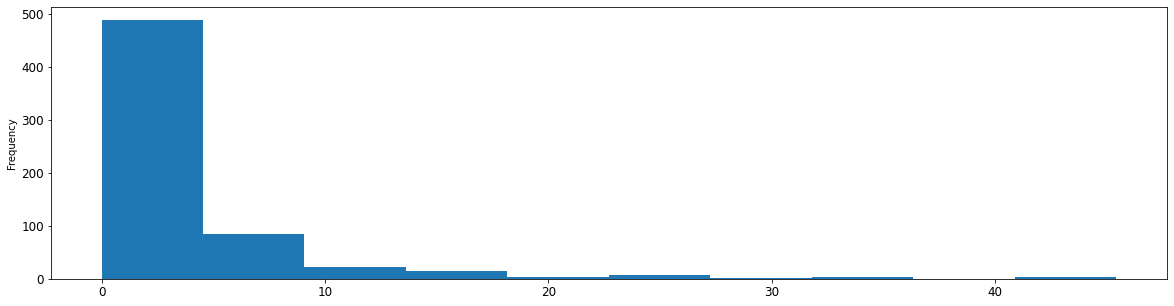

In [66]:
# Distance Distribution is OK, but too many zeros
print(data['Distance'].describe())
data['Distance'].plot.hist(figsize = [20, 5], fontsize = 12)
print('\n# of zeros:', len(data[data['Distance']==0]))

In [67]:
# Duration contains negative values / strings
print(data['Duration'].describe())


count          628
unique         540
top       00:11:04
freq             3
Name: Duration, dtype: object


In [68]:
data[data['Duration'].str.isnumeric() ==False]

,FleetNumber,AssetName2,DepartureTime,DepartFrom,DrivingTime,StandingTime,Duration,Distance,MaxSpeed,AvgSpeed,ArrivalTime,ArriveAt
22,AT018,Kaupa Kol (HBS),2022-07-14 00:03:04,Sorowar South Pit Access Rd,00:08:05,00:-08:-06,00:00:-01,0.0,19,0.0,2022-07-14 00:11:09,Sorowar Magazine


count    628.000000
mean      27.133758
std       12.772751
min        5.000000
25%       18.000000
50%       28.000000
75%       38.000000
max       62.000000
Name: MaxSpeed, dtype: float64


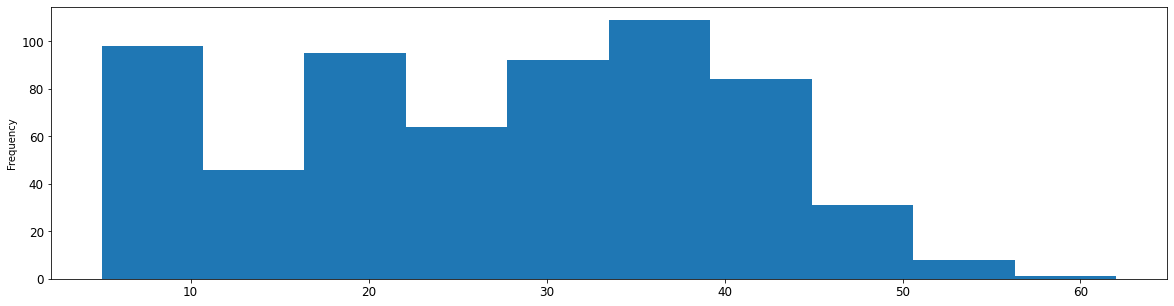

In [69]:
# Max Speed Distributions not OK
print(data['MaxSpeed'].describe())
data['MaxSpeed'].plot.hist(figsize = [20, 5], fontsize = 12)

count    628.000000
mean       9.590908
std        5.566545
min        0.000000
25%        7.097500
50%        9.925000
75%       12.007500
max       35.640000
Name: AvgSpeed, dtype: float64

# of zeros: 87


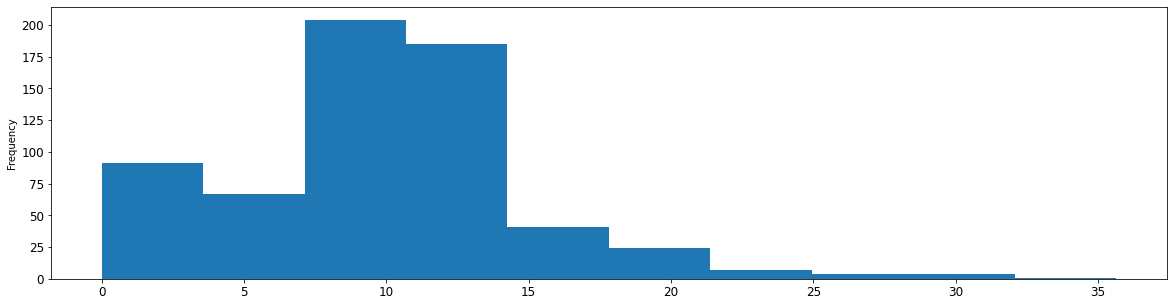

In [70]:
# Avg Speed is OK, but too many zeros
print(data['AvgSpeed'].describe())
data['AvgSpeed'].plot.hist(figsize = [20, 5], fontsize = 12)
print('\n# of zeros:', len(data[data['AvgSpeed']==0]))

count                          628
mean     0 days 00:20:26.495222929
std      0 days 00:36:35.295669501
min                0 days 00:00:00
25%         0 days 00:04:24.500000
50%         0 days 00:08:41.500000
75%         0 days 00:20:36.750000
max                0 days 05:57:22
dtype: object

# of zeros: 8


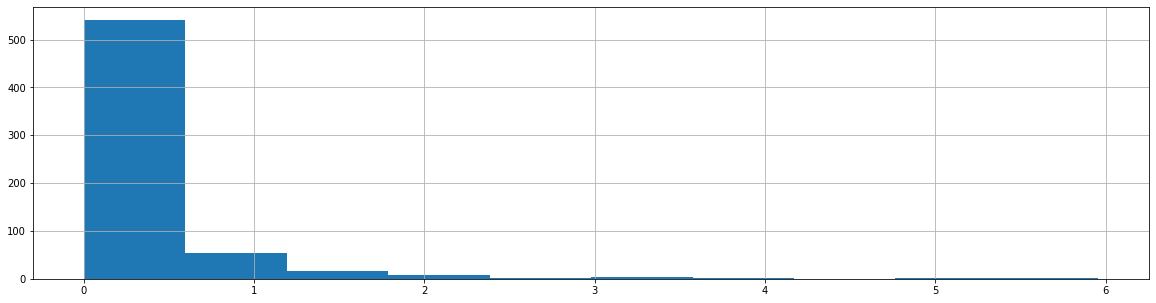

In [71]:
# Departure-Arrival Time Delta
departure = data['DepartureTime'].astype(str)
departure = departure.apply(pd.to_datetime)
arrival = data['ArrivalTime'].astype(str)
arrival = arrival.apply(pd.to_datetime)
print((arrival - departure).describe())
((arrival - departure).dt.total_seconds()/3600).hist(figsize = [20, 5])
print('\n# of zeros:', len(data[(arrival - departure).dt.total_seconds()==0]))


count                          628
mean     0 days 00:20:12.751592356
std      0 days 00:37:28.779558868
min                0 days 00:00:00
25%         0 days 00:04:20.500000
50%                0 days 00:08:40
75%         0 days 00:20:25.750000
max                0 days 05:57:22
Name: DrivingTime, dtype: object


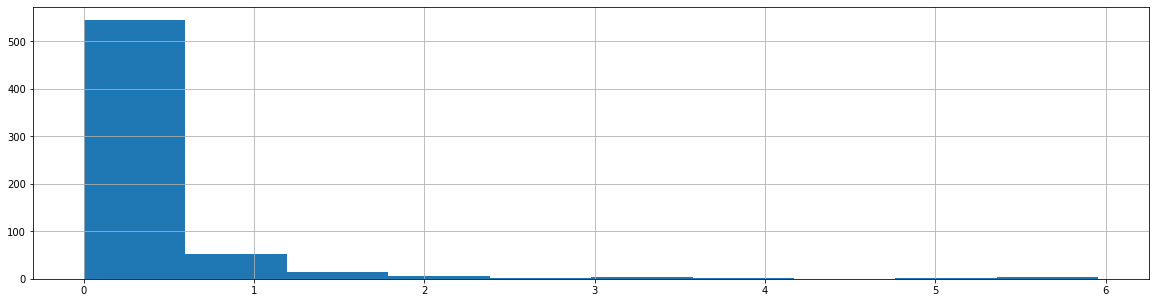

In [80]:
# Driving Time is close to Departure-Arrival Time Delta but not the same
data['DrivingTime'] = pd.to_timedelta(data['DrivingTime'].astype(str))
print(data['DrivingTime'].describe())
(data['DrivingTime'] .dt.total_seconds()/3600).hist(figsize = [20, 5])

count                        628
unique                        28
top       Sorowar South Pit/95RL
freq                         180
Name: DepartFrom, dtype: object


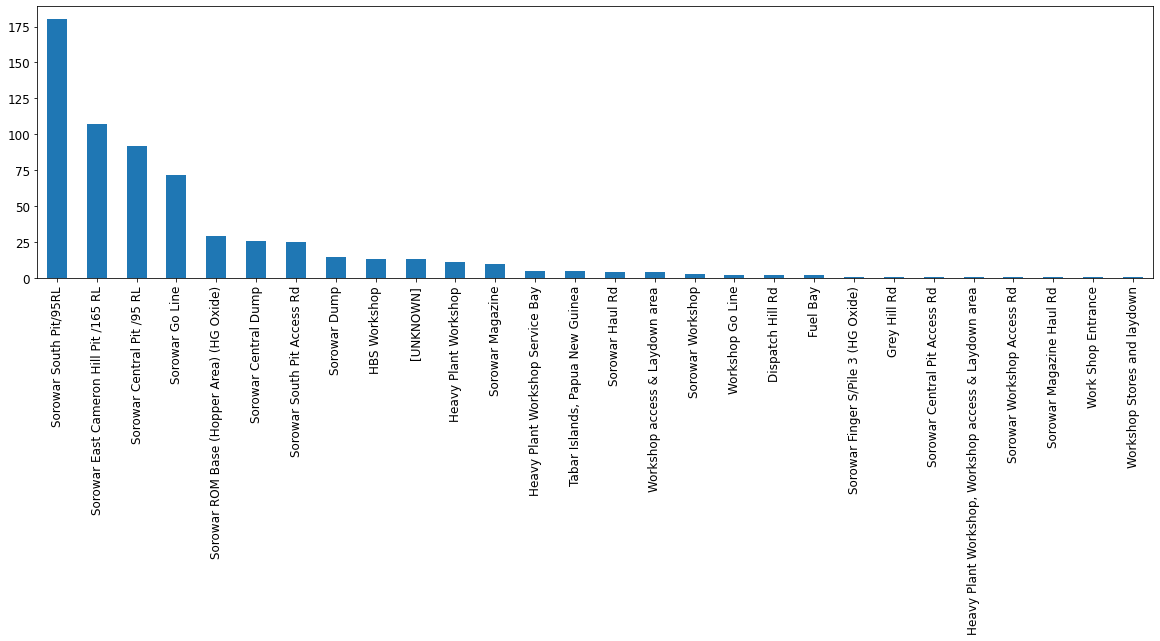

In [81]:
# Depart From Counts
print(data['DepartFrom'].describe())
data['DepartFrom'].value_counts().plot.bar(figsize = [20, 5], fontsize = 12)

count                        628
unique                        25
top       Sorowar South Pit/95RL
freq                         182
Name: ArriveAt, dtype: object


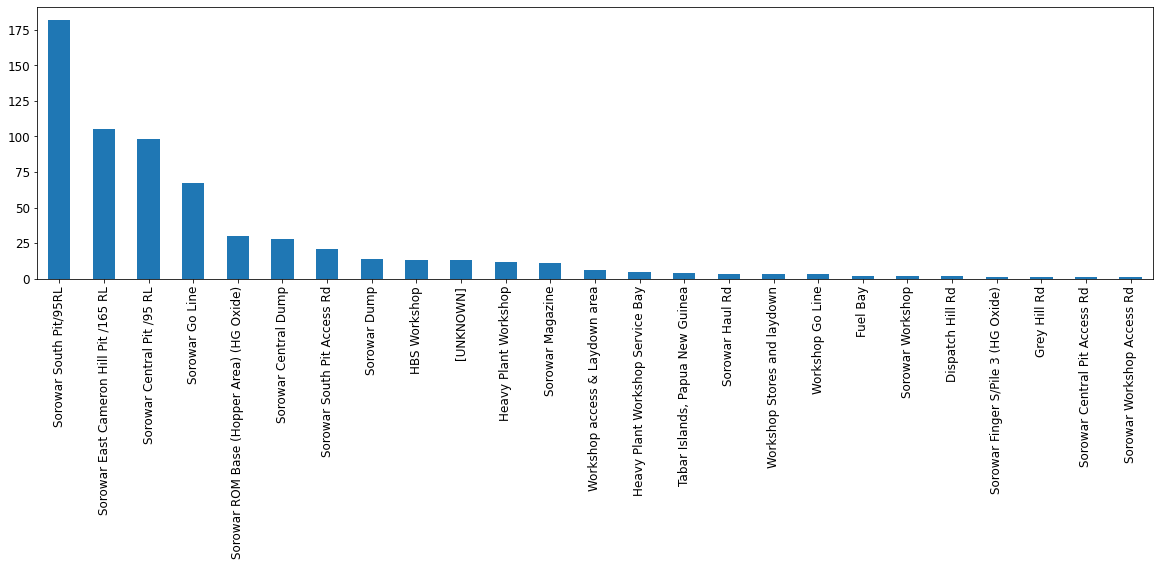

In [54]:
# Arrive At Counts
print(data['ArriveAt'].describe())
data['ArriveAt'].value_counts().plot.bar(figsize = [20, 5], fontsize = 12)

count                  628
unique                  63
top       Lava Igavu (HBS)
freq                    41
Name: AssetName2, dtype: object


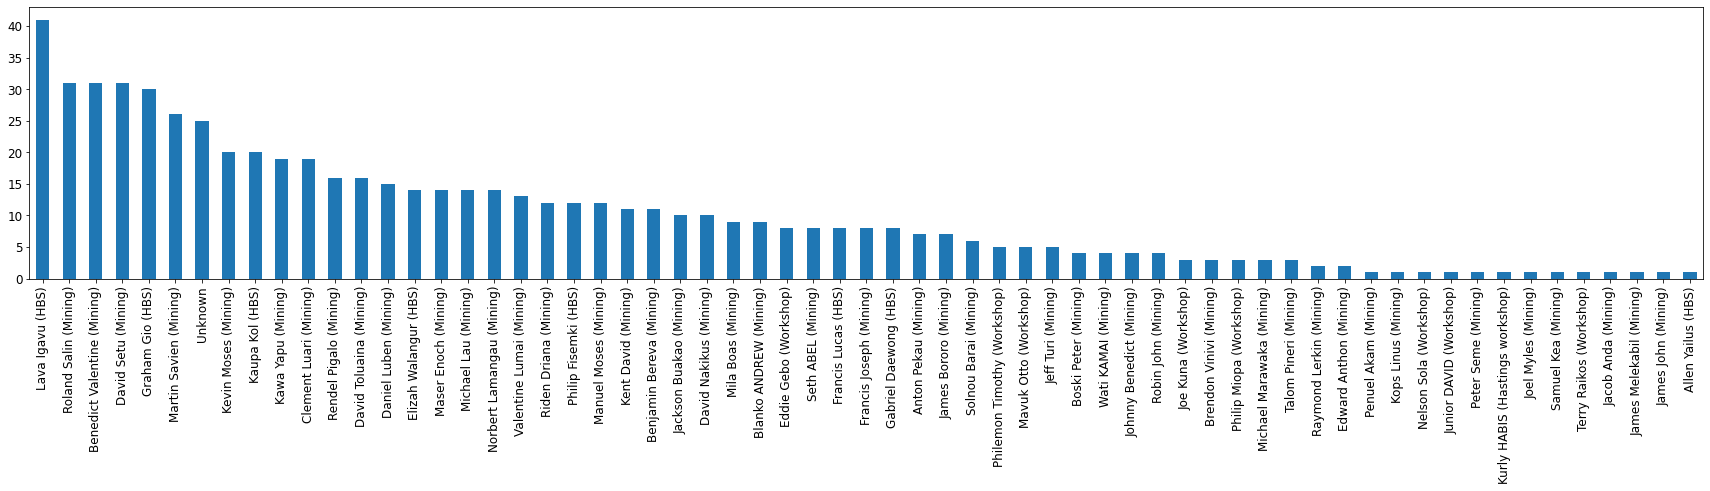

In [53]:
# Asset Counts
print(data['AssetName2'].describe())
data['AssetName2'].value_counts().plot.bar(figsize = [30, 5], fontsize = 12)

In [98]:
# Assets Usage
data[['FleetNumber','AssetName2','Distance']].groupby(by=['FleetNumber','AssetName2']).sum()

Distance
FleetNumber AssetName2                        
AT018       Allen Yailus (HBS)             1.7
            Francis Lucas (HBS)           60.3
            Kaupa Kol (HBS)               30.7
            Philip Fisemki (HBS)          42.5
AT019       Gabriel Daewong (HBS)        116.2
...                                        ...
AT629       Daniel Luben (Mining)         43.5
            James Melekabil (Mining)      43.0
            Raymond Lerkin (Mining)       16.8
            Solnou Barai (Mining)         44.7
            Valentine Lumai (Mining)      68.1

[79 rows x 1 columns]

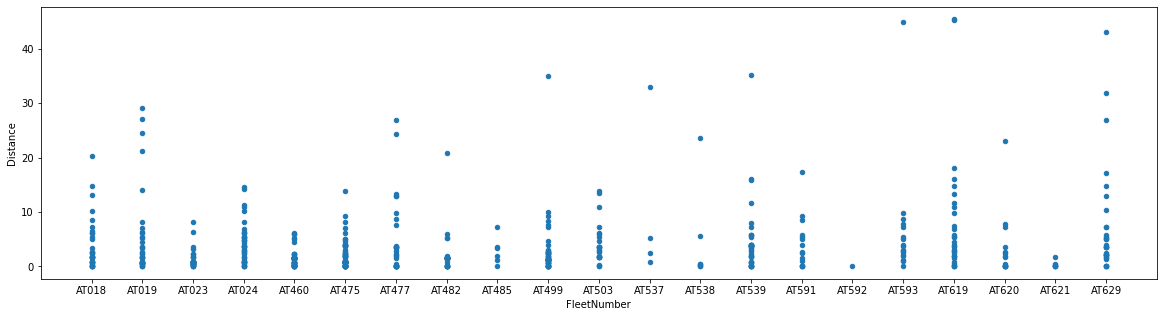

In [101]:
data.plot.scatter('FleetNumber','Distance', figsize = [20, 5])

In [130]:
# Range of Location coordinates grouped by DepartFrom are too wide (10-30 kms)
data[['DepartFrom','ArriveAt','Distance']].groupby(['DepartFrom','ArriveAt']).describe()



Distance  \
                                                                 count   
DepartFrom                     ArriveAt                                  
Dispatch Hill Rd               Sorowar Go Line                     2.0   
Fuel Bay                       Sorowar South Pit/95RL              2.0   
Grey Hill Rd                   Workshop access & Laydown area      1.0   
HBS Workshop                   Fuel Bay                            2.0   
                               HBS Workshop                        4.0   
...                                                                ...   
Workshop Stores and laydown    Workshop access & Laydown area      1.0   
Workshop access & Laydown area Sorowar Central Pit /95 RL          1.0   
                               Workshop Go Line                    1.0   
                               Workshop access & Laydown area      2.0   
[UNKNOWN]                      [UNKNOWN]                          13.0   

                                                                          \
                                                                    mean   
DepartFrom                     ArriveAt                                    
Dispatch Hill Rd               Sorowar Go Line                  2.450000   
Fuel Bay                       Sorowar South Pit/95RL          11.450000   
Grey Hill Rd                   Workshop access & Laydown area   3.500000   
HBS Workshop                   Fuel Bay                         0.150000   
                               HBS Workshop                     1.725000   
...                                                                  ...   
Workshop Stores and laydown    Workshop access & Laydown area   0.500000   
Workshop access & Laydown area Sorowar Central Pit /95 RL       7.200000   
                               Workshop Go Line                 0.100000   
                               Workshop access & Laydown area   0.900000   
[UNKNOWN]                      [UNKNOWN]                        4.453846   

                                                                              \
                                                                    std  min   
DepartFrom                     ArriveAt                                        
Dispatch Hill Rd               Sorowar Go Line                 2.192031  0.9   
Fuel Bay                       Sorowar South Pit/95RL          4.737615  8.1   
Grey Hill Rd                   Workshop access & Laydown area       NaN  3.5   
HBS Workshop                   Fuel Bay                        0.070711  0.1   
                               HBS Workshop                    2.381001  0.0   
...                                                                 ...  ...   
Workshop Stores and laydown    Workshop access & Laydown area       NaN  0.5   
Workshop access & Laydown area Sorowar Central Pit /95 RL           NaN  7.2   
                               Workshop Go Line                     NaN  0.1   
                               Workshop access & Laydown area  1.272792  0.0   
[UNKNOWN]                      [UNKNOWN]                       4.951366  0.1   

                                                                             \
                                                                 25%    50%   
DepartFrom                     ArriveAt                                       
Dispatch Hill Rd               Sorowar Go Line                 1.675   2.45   
Fuel Bay                       Sorowar South Pit/95RL          9.775  11.45   
Grey Hill Rd                   Workshop access & Laydown area  3.500   3.50   
HBS Workshop                   Fuel Bay                        0.125   0.15   
                               HBS Workshop                    0.075   0.90   
...                                                              ...    ...   
Workshop Stores and laydown    Workshop access & Laydown area  0.500   0.50   
Workshop access & Laydown area Sorowar Central Pi

## Data Reduction

In [135]:
# Reduce the dataset as required 

fleet='AT018'
day_data = data[data['FleetNumber']==fleet]

day = 13 # Reduce to first day of the month only
day_data = data[data['DepartureTime'].dt.day==day]

# Drop unnecessary columns 
day_data = day_data.drop(columns=['StandingTime','Duration','DrivingTime','Duration','MaxSpeed','AvgSpeed'])

# Rename remaining columns
day_data = day_data.rename(columns={'AssetName2':'DriverName'})

# Reorder and Re-index the columns
#day_data = day_data.reindex(columns=['',''])

day_data.head()

,FleetNumber,DriverName,DepartureTime,DepartFrom,Distance,ArrivalTime,ArriveAt
0,AT018,Allen Yailus (HBS),2022-07-13 08:10:53,HBS Workshop,1.7,2022-07-13 08:19:03,HBS Workshop
1,AT018,Francis Lucas (HBS),2022-07-13 10:00:03,HBS Workshop,0.1,2022-07-13 10:00:27,HBS Workshop
2,AT018,Francis Lucas (HBS),2022-07-13 10:16:18,HBS Workshop,10.1,2022-07-13 11:04:05,Sorowar ROM Base (Hopper Area) (HG Oxide)
3,AT018,Francis Lucas (HBS),2022-07-13 11:24:31,Sorowar ROM Base (Hopper Area) (HG Oxide),6.5,2022-07-13 11:42:12,HBS Workshop
4,AT018,Francis Lucas (HBS),2022-07-13 13:17:16,HBS Workshop,5.1,2022-07-13 13:33:58,HBS Workshop


In [151]:
# Save the reduced dataset to an Excel Spreadsheet
day_data.to_excel('Simberi_day_data.xlsx', sheet_name='daily')
!cp Simberi_day_data.xlsx "/content/drive/My Drive/Colab_Data/"